In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

Some examples of complex systems are analyzed. The ones that seem of interest for the project are genetic algorithms and artificial neural networks. 


## Genetic algorithm: getting a numerical password

Genetic algorithms evolve until they reached one specific value, which is the correct password. This may be achieved from the 'time' it takes to return that a password has failed (real life approximation), so the number of correct values is known, although the ones that are correct are unkwon (coded up this way). The code will depend on a string of positive numbers, bounded each one from 0 to 9.

#### Fitness function 

In [2]:
def fitness(trueCode, generation): 
    # compare digit by digit and get the number of the ones that are correct
    
    # fitness list
    fit = []
    
    # loop over the whole generation
    for i in range(len(generation)):
        # substract the values, the ones that are not zero (False) will be the differents
        fitness = np.sum((trueCode- generation[i]) != 0)
        # return the values that are correct 
        fit.append(len(trueCode) - fitness)

    return fit

#### First population

In [3]:
def first_gen(N, Nind): 
    # generate the first generation from random numbers
    
    # define a list for all the generation
    gen0 = []
    
    # append Nind of length N to the population
    for i in range(Nind):
        gen0.append(np.random.randint(0, 10, N))

    # return the list with the individuals
    return gen0

#### Selection

In [375]:
def selection(generation, fitness): 
    # select the individuals with fitness values above the mean

    # create an empty list for the intermediate population
    intPop = []
    
    # fill the list with the individuals that have fitness values above the mean
    for i in range(len(fitness)):
        if fitness[i] > np.mean(np.array(fitness)):
            intPop.append(generation[i])
    
    # return the intermediate population
    return intPop

#### Breeding

In [5]:
def breeding(newPopSize, intermediatePopulation): 
    # breed the intermediate population

    # create a list for the new population
    newPop = []
    
    # loop over the size of the new population size
    for i in range(newPopSize):
        # pick two random parents from intermediatePopulation
        ind0 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        ind1 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        while ind0 == ind1:
            ind1 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        # select the crossover point randomly
        crssPt = np.random.randint(0,len(intermediatePopulation[0]))
        # take [:crssPt] from first individual and [crssPt:] from the second to get the new individual        
        newPop.append(np.concatenate((intermediatePopulation[ind0][:crssPt],intermediatePopulation[ind1][crssPt:])))
    
    return newPop

#### Mutation

In [223]:
def mutation(newGeneration, currentGenIter, totalGenIter): 
    # mutate the new generation with a descending probability as generation evolves
    
    # for the first half of the algorithm, mutation probability will be
    if currentGenIter < totalGenIter/2 :
        p = 0.5*(totalGenIter - currentGenIter)/(totalGenIter)
    # for the second half of the iterations, probability will be fixed
    else:
        p = 0.2
    
    # create a list for the mutated generation
    mutatedGen = []
    
    # loop over the population
    for i in range(len(newGeneration)):
        # if the probability is below the limit
        if np.random.rand() < p:
            # create an empty deviation array
            deviation = np.zeros(len(newGeneration[0]))
            # add a random +1 or -1 in a random location
            deviation[np.random.randint(0,len(newGeneration[0])-1)] = np.random.choice([1,-1])
            # add this deviation to the individial
            mutatedGen.append(newGeneration[i] + (deviation).astype(int))
                           
        # otherwise keep the individual as it was
        else:
            # add the non-mutated individual
            mutatedGen.append(newGeneration[i])

        # corret numbers above 9 and below 0 to the range [0,9]
        if np.any(np.zeros(len(mutatedGen[i])) > mutatedGen[i]) or np.any(9*np.ones(len(mutatedGen[i])) < mutatedGen[i]):
            # with a random number in the interval
            mutatedGen[i][np.zeros(len(mutatedGen[i])) > mutatedGen[i]] = np.random.randint(0,10)
            mutatedGen[i][9*np.ones(len(mutatedGen[i])) < mutatedGen[i]] = np.random.randint(0,10)
            
    return mutatedGen

#### Looping in the algorithm

In [467]:
# true code to find
code = [5,4,1,2,1,3,5,9,8,0]

# find parameters of the algorithm
Nind = 50
Ngen = 250

In [468]:
# create a list to store the generation lists with the arrays inside
gen = []

# create the list to store the fitness value
fitList = []

# store the first generation in the generations list
gen.append(first_gen(len(code), Nind))

In [469]:
# loop over all generations
for i in range(Ngen):
    # fitness calculation
    fitList.append(fitness(code, gen[i]))
    # intermediate generation
    selectedGen = selection(gen[i], fitList[i])
    # breeding of the population
    bredGen = breeding(Nind, selectedGen)
    # mutation of the generation
    mutGen = mutation(bredGen, i, Ngen)
    # storage of the new generation
    gen.append(mutGen)

[None, None]

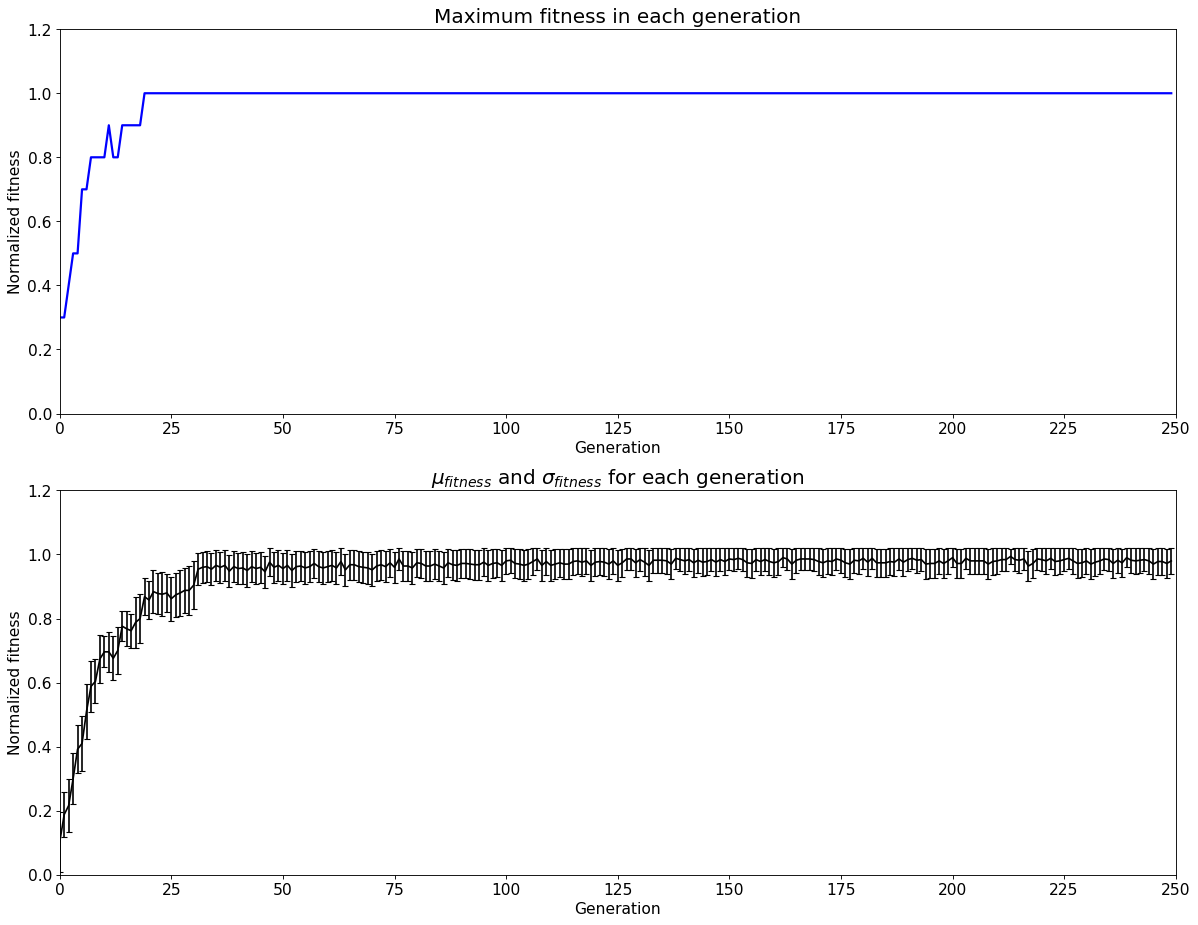

In [496]:
# compute the maximum fitness of each generation
yMax = np.array([np.max(fitList[i]) for i in range(Ngen)])/len(code)
# compute the mean of fitness of each generation
yMean = np.array([np.mean(fitList[i]) for i in range(Ngen)])/len(code)
# compute the standard deviation of fitness of each generation
yStd = np.array([np.std(fitList[i]) for i in range(Ngen)])/len(code)

# plot the results
fig, ax = plt.subplots(2,figsize=(18,14), dpi = 80)
ax[0].plot(np.linspace(0,Ngen-1,Ngen), yMax, 'b-', lw=2)
ax[1].errorbar(np.linspace(0,Ngen-1,Ngen),yMean,yStd,capsize=3, color='k')
[ax[i].set_ylim([0,1.2]) for i in range(2)]
[ax[i].set_xlim([0,Ngen]) for i in range(2)]
[ax[i].set_ylabel('Normalized fitness',fontsize = 14) for i in range(2)]
[ax[i].set_xlabel('Generation',fontsize = 14) for i in range(2)]
[ax[i].set_xticks(np.arange(0,275,25)) for i in range(2)]
ax[0].set_title('Maximum fitness in each generation', fontsize=18)
ax[1].set_title(r'$\mu_{fitness}$ and $\sigma_{fitness}$ for each generation', fontsize=18)
[ax[i].tick_params(axis='both', which='major', labelsize=14) for i in range(2)]

## Neural network 
The next example is a very simple neural network, trained with backpropigation to compute square roots.

In [497]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)


# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print ("Output After Training:")
print (l1)

Output After Training:
[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]
